# Titanic Survival Predictions

#### by Adit Rada


### Ever wondered how you would have fared on the Titanic? Well, lets find out!

In [1]:
import numpy as np
import pandas as pd

## Data Extraction and Preprocessing 

#### The data is from Kaggle and contains 891 samples in training set and 418 in test set.

Let us load the data. The training data is in train.csv; the test data together with the test labels are in test.csv

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col = 0)

Let us take a look at how the raw data looks like:

In [3]:
display(train.head())
display(test.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###### Let us check if of the data columns have missing values so we can know how to handle them properly.

In [4]:
columns = [train.Name, train.Sex, train.Age, train.SibSp, train.Parch, 
           train.Ticket, train.Fare, train.Cabin, train.Embarked]
str_columns = ["Name", 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

for i in range(len(str_columns)):
    print("No. of missing values in " + str_columns[i] + " : ", end = ' ')
    print(len(train.loc[columns[i].isnull()]))

No. of missing values in Name :  0
No. of missing values in Sex :  0
No. of missing values in Age :  177
No. of missing values in SibSp :  0
No. of missing values in Parch :  0
No. of missing values in Ticket :  0
No. of missing values in Fare :  0
No. of missing values in Cabin :  687
No. of missing values in Embarked :  2


From using common sense, we can rule out that the Name and the Ticket no. of a passenger will have no impact on their survival. So we can drop Name and Ticket no.


Although the Cabin type may have a slight impact on the survival rate, but almost 78% os the samples have a missing Cabin type. Due to the lack of information, we will drop the Cabin too.

In [5]:
# Dropping the irrelevant features
train = train.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [6]:
display(train.head())
display(test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


###### We now have to deal with the 177 missing Age values and the 2 missing Embarked Values

Since Age in continuos, the best way to deal with missing Age is to replace it with the average of the Age values.
Similarly, we will replace the missing Embarked values with the mode of the Embarked values.

In [7]:
mean_age = train.Age.mean()
mode_embarked = train.Embarked.value_counts()

print("Mean of Age: ", mean_age)
print("Mode of Embarked : ")
print(mode_embarked)

Mean of Age:  29.69911764705882
Mode of Embarked : 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


###### So, we will replace the missing Age values with 29.7 and the missing Embarked values with "S"

In [8]:
# Let us make a copy of the DataFrame in case we need it later
train_without_replacement = train
test_without_replacement = test

# Replacing the missing Age values
train.Age = train.Age.fillna(29.7)
test.Age = test.Age.fillna(29.7)

# Replacing the missing Embarked values
train.Embarked = train.Embarked.fillna('S')

In [9]:
display(train.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


#### Now that we have filled in the missing values, let us deal with the categorical features in our dataset.

We will us One-Hot-Encoding to peoperly represent Pclass, Sex and Embarked. We will use the get_dummies function of pandas to get the one-hot-encoded features. 

We will also have to change the Pclass data type to string as get_dummies only works on string data.

In [10]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

# Changin Pclass to str dtype as get_dummies only works for string dtype
train_dummies['Pclass'] = train_dummies['Pclass'].astype(str)
test_dummies['Pclass'] = test_dummies['Pclass'].astype(str)

train_dummies = pd.get_dummies(train_dummies, columns=['Pclass'])
test_dummies = pd.get_dummies(test_dummies, columns=['Pclass'])

Doing the same thing but now for the training set without the Age. We do this since we replaced 177 missing Age values. So we will check to see if adding synthetic Age values really hurts the mean.

In [11]:
train_without_age = train_without_replacement.drop(['Age'], axis = 1)
test_without_age = test_without_replacement.drop(['Age'], axis = 1)


# One-hot-encoding
train_without_age_dummies = pd.get_dummies(train_without_age)
test_without_age_dummies = pd.get_dummies(test_without_age)

# Changin Pclass to str dtype as get_dummies only works for string dtype
train_without_age_dummies['Pclass'] = train_without_age_dummies['Pclass'].astype(str)
test_without_age_dummies['Pclass'] = test_without_age_dummies['Pclass'].astype(str)

train_without_age_dummies = pd.get_dummies(train_without_age_dummies, columns=['Pclass'])
test_without_age_dummies = pd.get_dummies(test_without_age_dummies, columns=['Pclass'])

display(train_without_age_dummies.head())
display(test_without_age_dummies.head())

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,0,0,8.0500,0,1,0,0,1,0,0,1


,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
892,0,0,7.8292,0,1,0,1,0,0,0,1
893,1,0,7.0000,1,0,0,0,1,0,0,1
894,0,0,9.6875,0,1,0,1,0,0,1,0
895,0,0,8.6625,0,1,0,0,1,0,0,1
896,1,1,12.2875,1,0,0,0,1,0,0,1


In [12]:
display(train_dummies.head())
display(test_dummies.head())

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
892,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
894,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
895,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


There is only one Nan Value in the Test dataset; we will deal with in the same way as we did for Age in train dataset; we will replace it with the mean value.

In [13]:
test_dummies.loc[test_dummies.Fare.isnull()]

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1044,60.5,0,0,NaN,0,1,0,0,1,0,0,1


In [14]:
mean_fare = train_dummies.Fare.mean()
print(mean_fare)

32.2042079685746


In [15]:
test_dummies.Fare = test_dummies.Fare.fillna(32.2042)
test_without_age_dummies.Fare = test_without_age_dummies.Fare.fillna(32.2042)

###### Althought it might seem counter-intuitive to replace it with the training Fare mean, it is the right thing to do!

### Let us take a look at the data once again before we build the models. We will take a step back and try to discuss what the features really mean.

In [16]:
display(train_dummies.head())

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


### Discussion

Let us go feature by feature:

1) Age - This may help as may be high age or low age indicate a higher survival rate due to getting more proprity for the  lifeboats; or it may be higher the age lower the chances of survival due to lack of physical energy.

2) Sibling & Spouse On Board - Maybe the higher this value, higher the chance of survival due to proirty on lifeboats.

3) Parents, Children & Sex - Parents, children and females may have higher chance of survival again due to priority on lifeboards.

4) Embarked - This may not have a very big difference but we may be wrong. Maybe, the place you Embarked was a rich area and you have prority on the lifeboats. C = Cherbourg, Q = Queenstown, S = Southampton

5) Passenger Class - This will surely make a differnce as higer the passenger class, more the survival rate.

##### We will now convert the data into NumPy arrays so that scikit-learn can handle it.

In [17]:
X_train = train_dummies.loc[:, 'Age':].values
y_train = train_dummies.loc[:, 'Survived'].values
X_test = test_dummies.loc[:, 'Age':].values

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 12)
(891,)
(418, 12)


###### So we have 12 features for now.

In [19]:
X_train_without_age = train_without_age_dummies.loc[:, 'SibSp':].values
X_test_without_age = test_without_age_dummies.loc[:, 'SibSp':].values

In [20]:
print(X_train_without_age.shape)
print(X_test_without_age.shape)

(891, 11)
(418, 11)


## Models before any Feature Engineering

##### Let us see how our models perform before we carry out any sort of feature engineering.

###### We will use GridSearchCV to tune the hyperparameters.

### 1) Logistic Regression (Accuracy - 80%)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# The hyperparameters to search over
param_grid = {'C':[0.01, 0.1, 1 ,10, 100]}

# Instantiating the model
grid_logreg = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)

In [22]:
# Fitting the model
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

##### Let us see what was the best score while doing grid search and also the best hyperparameters found.

In [23]:
print("Best hyperparameters: {}".format(grid_logreg.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_logreg.best_score_))

Best hyperparameters: {'C': 0.1}
Best cross-validation score for those hyperparameters: 0.80


##### It does quite well with a score of 80% on test set despite a lower cross validation score while building the model.

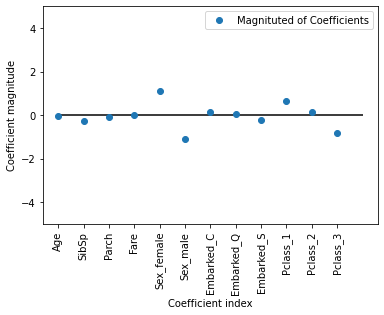

In [31]:
import matplotlib.pyplot as plt
feature_names = ["Age", "SibSp", "Parch", "Fare", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", 
                            "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"]

plt.plot(grid_logreg.best_estimator_.coef_.T, 'o', label="Magnituted of Coefficients")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

#### We will look go into a detailed discussion of these coefficients below. Don't miss on that!

### 2) Support Vector Machine (Accuracy - 79%)

###### We will repeat the same process by using grid search to select the best kernel AND hyperparameters.

In [27]:
from sklearn.svm import SVC

# The kernel and associated hyperparameters to search over
param_grid = [{'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
                {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]}]

# Instantiating the model
grid_svm = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

In [28]:
# Fitting the model
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}])

In [29]:
print("Best hyperparameters:  {}".format(grid_svm.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_svm.best_score_))

Best hyperparameters:  {'C': 100, 'kernel': 'linear'}
Best cross-validation score for those hyperparameters: 0.79


###### SVM performs quite similar to logistic regression with 79% accuracy.

### 3) Random Forest (Accuracy - 80%)

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)

# Since there are no hyperparameters to search over, we will just use the cross_val_score function
from sklearn.model_selection import cross_val_score
scores_forest = cross_val_score(forest, X_train, y_train)

In [33]:
print("Best cross-validation score for 10 Random Forests: {:.2f}".format(np.mean(scores_forest)))

Best cross-validation score for 10 Random Forests: 0.80


###### Random Forest too performs quite similar to the previous two models with 80% accuracy.

## Feature Engineering

We will make copies of the training data so that we don't curropt the original data

In [34]:
X_train2 = X_train

print(X_train2.shape)
print(y_train.shape)

(891, 12)
(891,)


### Binning/Discretization

###### Let us look at the satisctics of Age and Fare (the only two continuos features)

In [35]:
print("Age Statistics:")
display(train_dummies.Age.describe())

print("Fare Statistics:")
display(train_dummies.Fare.describe())

Age Statistics:


count    891.000000
mean      29.699293
std       13.002015
min        0.420000
25%       22.000000
50%       29.700000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Fare Statistics:


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

###### We immideately notice form the interquartile range and the max value for Fare, that the data is very skewed; so, binning does not make sense for Fare values.

###### We will instead try binning for Age since it seems to be more Nearly Normal

In [36]:
# Making the bins
bins = np.linspace(0, 80, 16)

# Creating bins for the data
which_bin_train = np.digitize(X_train2, bins=bins)

print("\nData points:\n", X_train2[:5])
print("\nBin membership for data points:\n", which_bin_train[:5])


Data points:
 [[22.      1.      0.      7.25    0.      1.      0.      0.      1.
   0.      0.      1.    ]
 [38.      1.      0.     71.2833  1.      0.      1.      0.      0.
   1.      0.      0.    ]
 [26.      0.      0.      7.925   1.      0.      0.      0.      1.
   0.      0.      1.    ]
 [35.      1.      0.     53.1     1.      0.      0.      0.      1.
   1.      0.      0.    ]
 [35.      0.      0.      8.05    0.      1.      0.      0.      1.
   0.      0.      1.    ]]

Bin membership for data points:
 [[ 5  1  1  2  1  1  1  1  1  1  1  1]
 [ 8  1  1 14  1  1  1  1  1  1  1  1]
 [ 5  1  1  2  1  1  1  1  1  1  1  1]
 [ 7  1  1 10  1  1  1  1  1  1  1  1]
 [ 7  1  1  2  1  1  1  1  1  1  1  1]]


In [37]:
from sklearn.preprocessing import OneHotEncoder

# Transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Nncoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin_train)

# Transform creates the one-hot encoding
X_train_binned = encoder.transform(which_bin_train)

print(X_train_binned[:5])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [38]:
print("Shape of binned training set: {}".format(X_train_binned.shape))

Shape of binned training set: (891, 43)


#### 4) Logistic Regression with binning (Accuracy 71%)

Let us now run logistic regression with the binned training set:

In [39]:
# The hyperparameters to search over
param_grid = {'C':[0.01, 0.1, 1 ,10, 100]}

# Instantiating the model
grid_logreg_binned = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)

# Fitting the model
grid_logreg_binned.fit(X_train_binned, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [40]:
print("Best hyperparameters: {}".format(grid_logreg_binned.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_logreg_binned.best_score_))

Best hyperparameters: {'C': 10}
Best cross-validation score for those hyperparameters: 0.71


###### Binning the Age values decreased the the score to 71% from 80%. So binning did not help!

### Interactions

##### Let us see if adding interactions between the features helps the model.

First, we will check the score by just adding the old fetures to the binned features.

In [41]:
X_combined = np.hstack([X_train2, X_train_binned])
print(X_combined.shape)

(891, 55)


#### 5) Logistic Regression binning and old features (Accuracy 81%)

In [42]:
# The hyperparameters to search over
param_grid = {'C':[0.01, 0.1, 1 ,10, 100]}

# Instantiating the model
grid_logreg_combined = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)

# Fitting the model
grid_logreg_combined.fit(X_combined, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [43]:
print("Best hyperparameters: {}".format(grid_logreg_combined.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_logreg_combined.best_score_))

Best hyperparameters: {'C': 1}
Best cross-validation score for those hyperparameters: 0.81


###### Comning the old features with the binnedd features helps! The score increased, though only slightly, to 81% from 80%.


The score with only binned data was 71%. This score only confirms our intuition from the previous model that binning is not useful. This is as the higher score now is only due to the old featueres being added back to the deature vector.

#### 6) Logistic Regression with interactions (Accuracy 71%)

##### Let us just try interactions between the data to see if it helps:

In [44]:
X_product = np.hstack([X_train_binned, X_train2[:,0].reshape(891,1) * X_train_binned]) 

print(X_product.shape)

(891, 86)


In [45]:
# The hyperparameters to search over
param_grid = {'C':[0.01, 0.1, 1 ,10, 100]}

# Instantiating the model
grid_logreg_interactions = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)

# Fitting the model
grid_logreg_interactions.fit(X_product, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [46]:
print("Best hyperparameters: {}".format(grid_logreg_interactions.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_logreg_interactions.best_score_))

Best hyperparameters: {'C': 0.01}
Best cross-validation score for those hyperparameters: 0.71


##### Interactions dont't help also! 

### From the lower scores form the binning and interactions, we see that this sort of feature engineering is not helping and it is best for us to simply stick with the original feature set.

### Rescaling the Data

##### It is known that SVM benefits from having all the features being on a similar scale. Let us see if that appliest to this dataset.

###### Although it will be very hard to beat the 99% accuracy we got on the original feature set.

We will use the MinMaxScaler which scales all the data such that all the values are in the interval [0,1]

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train2)

In [48]:
print(X_train_scaled.shape)
print(y_train.shape)

(891, 12)
(891,)


#### 7) SVM with rescaled data (Accuracy 82%)/(90% faster)

In [49]:
# Hyperparameters to search over together with their associated kernels
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

# Instantiating the model
grid_svm_scaled = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

In [50]:
# Fitting the model
grid_svm_scaled.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [51]:
print("Best hyperparameters: {}".format(grid_svm_scaled.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_svm_scaled.best_score_))

Best hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score for those hyperparameters: 0.82


###### The accuracy score did increase from 79% to 82%. So the rescaling did help!

##### An intersting point to note is that, while training the model, the speed of the training process increased by almost 90%. This suggest that rescaling the data helps in terms of speed also. 

##### For SVM, we notice that both speed and accuracy increases with rescaled data. So, rescaling is the way to go for SVM.

## The Effect of the Age Feature

###### Remember that our training data had 177 samples with missing Age values.
We replaced these with the mean value and that was fine as the Age distibution was net skewed and was Nearly Normal.

Let us take a look once again to see how the model perform if we remove the Age values completely.

Remember from the discussion, we hypothesized that Age would be helpful as very high age or very low age means higher the chances of survival due to higher priority on lifeboats.

### 8) Logistic Regression without Age (Accuracy - 79%)

In [52]:
# The hyperparameters to search over
param_grid = {'C':[0.01, 0.1, 1 ,10, 100]}

# Instantiating the model
grid_logreg_without_age = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)

grid_logreg_without_age.fit(X_train_without_age, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [53]:
print("Best hyperparameters: {}".format(grid_logreg_without_age.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_logreg_without_age.best_score_))

Best hyperparameters: {'C': 0.1}
Best cross-validation score for those hyperparameters: 0.79


#### The generalization score actually decreased, though only to 79% from 80%, this gives a stong indication that out hypothesis was wrong and that Age does not make a big difference.

###### Another point to remember however is that, we mentioned both high age (elderly) and low age (children) get preferential tratement. So survival increases for both these groups; hence, they average out and cancel due to being on the opposite ends of the spectrum. Therefore, age does not end up being a bigh factor the way we expected it to be.

#### Back to the Discussion

In [54]:
feature_names_without_age = ["SibSp", "Parch", "Fare", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", 
                            "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"]

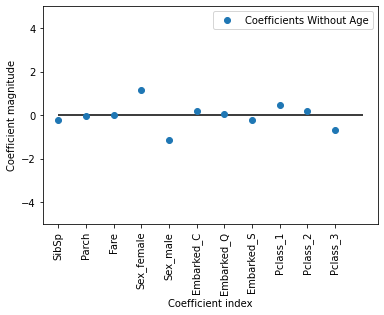

In [55]:
plt.plot(grid_logreg_without_age.best_estimator_.coef_.T, 'o', label="Coefficients Without Age")
plt.xticks(range(X_train_without_age.shape[1]), feature_names_without_age, rotation=90)
plt.hlines(0, 0, X_train_without_age.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

###### Here, we see the affect of each factor when all other factors stay constant through the coefficients.

Points to note:
1) We notice that females have a highest chance of survival, when all other factors are constant. This confirms our hypothesis; and the main reason may be that they get higher priority for lifeboats.
    Another point to note is that being a male hurts your chances of survival.

2) When all other factors remain constant, we can also see those that are in first class have higher chances of survival. In fact, being in third class actually hurts your chances of survival when all other factors remain constant.

3) Other factors like no. of siblings, parents and children on board play much less effect when all other factors are constant.

4) C = Cherbourg, Q = Queenstown, S = Southampton.
    When all other factors remain constant; it seems like embarking at Cherbourg helped your chances of survival and embarking
    at Southampton hurt it. This may suggest that those passengers who embarked at Cherbourg may have been wealthy so may   belong to first class.

#### These coefficients produced give us great insight into the survival of passengers on Titanic. One thing we learn is that it was definately not by pure chance or luck alone!

### 9) Support Vector Machine without Age (Accuracy 94%)

In [56]:
# The kernel and associated hyperparameters to search over
param_grid = [{'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
                {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]}]

# Instantiating the model
grid_svm_without_age = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

# Fitting the model
grid_svm_without_age.fit(X_train_without_age, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}])

In [57]:
print("Best hyperparameters:  {}".format(grid_svm_without_age.best_params_))
print("Best cross-validation score for those hyperparameters: {:.2f}".format(grid_svm_without_age.best_score_))

Best hyperparameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score for those hyperparameters: 0.79


##### The score for SVM did not change from 79% to 79%.

##### The scores remaining the same further confirms what we learnt from logistic regression: that age does not play a big role in the feature set.

## Conclusion

- We learnt that feature engineering did not really help as the models we built after feature engineering had lower generalization scores. So, it is better to use the raw data instead.

- Also, from the discussion above we learnt that survival on the Titanic was not simply by chance or random.
    In particular, being a female, being in First class and embarking at Cherbourg ensure a higher survival rate.

Let us take one final look at all the models we built and thier accuracies:

Age included in the feature set:

1) Logistic Regression (Accuracy - 80%)

2) Support Vector Machine (Accuracy - 79%)

3) Random Forest (Accuracy - 80%)


Feature Engineering:

4) Logistic Regression with binning (Accuracy 71%)

5) Logistic Regression binning and old features (Accuracy 81%)

6) Logistic Regression with interactions (Accuracy 71%)

7) SVM with rescaled data (Accuracy 82%)/(90% faster)


Age removed from the feature set:

8) Logistic Regression (Accuracy 79%)

9) Support Vector Machine (Accuracy 79%)